In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading And Initial Overview

In [2]:
df = pd.read_csv(r"C:\Users\alnat\Downloads\RetailOrders_SuperStore.csv")

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Month,Ship Mode,Customer ID,Customer Name,Gender,Segment,...,Sub-Category,Product Name,Unit Price,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,1,ORD-2018-0001,06-Sep-18,10-Sep-18,September,Second Class,CUST-2018-0001,Ajiono Saefullah,Male,Home Office,...,Chairs,Chairs - Ab,137.457370,412.372111,4,0.25,68.524422,13.95,Critical,2018
1,2,ORD-2017-0002,22-Oct-17,30-Oct-17,October,Standard Class,CUST-2017-0002,"R.M. Nalar Anggraini, S.Psi",Male,Consumer,...,Tables,Tables - Repellat,100.318835,571.817358,6,0.05,93.213472,21.15,Low,2017
2,3,ORD-2020-0003,15-Mar-20,20-Mar-20,March,First Class,CUST-2020-0003,"Betania Gunawan, S.H.",Female,Home Office,...,Copiers,Copiers - Fugit,171.463185,336.067842,2,0.02,49.193568,18.02,High,2020
3,4,ORD-2017-0004,26-Dec-17,28-Dec-17,December,Same Day,CUST-2017-0004,"Malik Puspita, S.H.",Female,Corporate,...,Art,Art - Reprehenderit,106.830766,347.199988,5,0.35,61.229998,8.21,Medium,2017
4,5,ORD-2020-0005,04-Jun-20,08-Jun-20,June,Second Class,CUST-2020-0005,Gawati Mandala,Female,Corporate,...,Tables,Tables - Provident,126.384280,606.644546,6,0.20,75.238909,46.09,Low,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,ORD-2017-4996,07-May-17,16-May-17,May,First Class,CUST-2017-4996,Syahrini Hutagalung,Male,Home Office,...,Binders,Binders - Dicta,353.879386,318.491447,1,0.10,33.348289,30.35,Critical,2017
4996,4997,ORD-2016-4997,16-Jul-16,19-Jul-16,July,Same Day,CUST-2016-4997,Jati Prayoga,Male,Corporate,...,Accessories,Accessories - Repudiandae,716.668459,2150.005377,5,0.40,408.001076,22.00,High,2016
4997,4998,ORD-2020-4998,11-Jan-20,13-Jan-20,January,First Class,CUST-2020-4998,Padma Nugroho,Male,Consumer,...,Phones,Phones - Non,91.115569,637.808985,7,0.00,96.681797,30.88,High,2020
4998,4999,ORD-2020-4999,10-Jun-20,15-Jun-20,June,Second Class,CUST-2020-4999,Kamaria Nurdiyanti,Male,Corporate,...,Furnishings,Furnishings - Commodi,425.504214,255.302528,1,0.40,20.070506,30.99,Critical,2020


In [4]:
#Number of rows and columns
print("Number of Rows and Columns:", df.shape)

Number of Rows and Columns: (5000, 34)


In [5]:
#Datatypes of each column
df.dtypes

Row ID               int64
Order ID            object
Order Date          object
Ship Date           object
Ship Month          object
Ship Mode           object
Customer ID         object
Customer Name       object
Gender              object
Segment             object
Contact ID          object
Addressline         object
Contact             object
Email               object
Postal Code          int64
City                object
State               object
Country             object
Region              object
Market              object
Product ID          object
Category ID         object
Category            object
Sub Category ID     object
Sub-Category        object
Product Name        object
Unit Price         float64
Sales              float64
Quantity             int64
Discount           float64
Profit             float64
Shipping Cost      float64
Order Priority      object
Year                 int64
dtype: object

In [6]:
#Initial Observations
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Month,Ship Mode,Customer ID,Customer Name,Gender,Segment,...,Sub-Category,Product Name,Unit Price,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,1,ORD-2018-0001,06-Sep-18,10-Sep-18,September,Second Class,CUST-2018-0001,Ajiono Saefullah,Male,Home Office,...,Chairs,Chairs - Ab,137.457370,412.372111,4,0.25,68.524422,13.95,Critical,2018
1,2,ORD-2017-0002,22-Oct-17,30-Oct-17,October,Standard Class,CUST-2017-0002,"R.M. Nalar Anggraini, S.Psi",Male,Consumer,...,Tables,Tables - Repellat,100.318835,571.817358,6,0.05,93.213472,21.15,Low,2017
2,3,ORD-2020-0003,15-Mar-20,20-Mar-20,March,First Class,CUST-2020-0003,"Betania Gunawan, S.H.",Female,Home Office,...,Copiers,Copiers - Fugit,171.463185,336.067842,2,0.02,49.193568,18.02,High,2020
3,4,ORD-2017-0004,26-Dec-17,28-Dec-17,December,Same Day,CUST-2017-0004,"Malik Puspita, S.H.",Female,Corporate,...,Art,Art - Reprehenderit,106.830766,347.199988,5,0.35,61.229998,8.21,Medium,2017
4,5,ORD-2020-0005,04-Jun-20,08-Jun-20,June,Second Class,CUST-2020-0005,Gawati Mandala,Female,Corporate,...,Tables,Tables - Provident,126.384280,606.644546,6,0.20,75.238909,46.09,Low,2020


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row ID           5000 non-null   int64  
 1   Order ID         5000 non-null   object 
 2   Order Date       5000 non-null   object 
 3   Ship Date        5000 non-null   object 
 4   Ship Month       5000 non-null   object 
 5   Ship Mode        5000 non-null   object 
 6   Customer ID      5000 non-null   object 
 7   Customer Name    5000 non-null   object 
 8   Gender           5000 non-null   object 
 9   Segment          5000 non-null   object 
 10  Contact ID       5000 non-null   object 
 11  Addressline      5000 non-null   object 
 12  Contact          5000 non-null   object 
 13  Email            5000 non-null   object 
 14  Postal Code      5000 non-null   int64  
 15  City             5000 non-null   object 
 16  State            5000 non-null   object 
 17  Country       

In [8]:
#Statistical summary for Numerical values
df.describe()

,Row ID,Postal Code,Unit Price,Sales,Quantity,Discount,Profit,Shipping Cost,Year
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,50339.219800,207.881375,725.682755,5.476800,0.250466,117.801601,27.334950,2017.996400
std,1443.520003,28784.503048,155.329339,646.501793,2.873032,0.144942,129.807299,12.922924,1.413502
min,1.000000,20.000000,1.494845,10.950000,1.000000,0.000000,-43.966077,5.020000,2016.000000
25%,1250.750000,25567.750000,104.783684,336.622274,3.000000,0.120000,39.694476,16.117500,2017.000000
50%,2500.500000,49974.500000,163.220521,543.139209,5.000000,0.250000,81.872792,27.275000,2018.000000
75%,3750.250000,75630.500000,267.735930,876.450310,8.000000,0.380000,146.977941,38.390000,2019.000000
max,5000.000000,99944.000000,1562.068966,6875.393750,10.000000,0.500000,1328.678750,49.980000,2020.000000


#Handling Missing Values

In [9]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Month         0
Ship Mode          0
Customer ID        0
Customer Name      0
Gender             0
Segment            0
Contact ID         0
Addressline        0
Contact            0
Email              0
Postal Code        0
City               0
State              0
Country            0
Region             0
Market             0
Product ID         0
Category ID        0
Category           0
Sub Category ID    0
Sub-Category       0
Product Name       0
Unit Price         0
Sales              0
Quantity           0
Discount           0
Profit             0
Shipping Cost      0
Order Priority     0
Year               0
dtype: int64

In [10]:
#Drop rows where critical fields are missing
df.dropna(subset=['Order Date','Product ID','Quantity'], inplace = True)

#Removing Duplicates

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(5000, 34)

#Correcting Datatypes

In [13]:
# 1 Convert to Datetime Format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%b-%y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%b-%y')

In [14]:
# 2 Convert Numeric Columns to float or int
df['Sales'] = pd.to_numeric(df['Sales'])
df['Profit'] = pd.to_numeric(df['Profit'])
df['Discount'] = pd.to_numeric(df['Discount'])
df['Shipping Cost'] = pd.to_numeric(df['Shipping Cost'])
df['Unit Price'] = pd.to_numeric(df['Unit Price'])
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['Row ID'] = pd.to_numeric(df['Row ID'])

In [15]:
# 3 Convert Categorical Columns to catergory
cat_cols = [
    'Segment','Ship Mode','Gender','Region','Category','Sub-Category',
    'Order Priority','Customer ID','Customer Name','Product Name'
]

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [16]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Month,Ship Mode,Customer ID,Customer Name,Gender,Segment,...,Sub-Category,Product Name,Unit Price,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,1,ORD-2018-0001,2018-09-06,2018-09-10,September,Second Class,CUST-2018-0001,Ajiono Saefullah,Male,Home Office,...,Chairs,Chairs - Ab,137.457370,412.372111,4,0.25,68.524422,13.95,Critical,2018
1,2,ORD-2017-0002,2017-10-22,2017-10-30,October,Standard Class,CUST-2017-0002,"R.M. Nalar Anggraini, S.Psi",Male,Consumer,...,Tables,Tables - Repellat,100.318835,571.817358,6,0.05,93.213472,21.15,Low,2017
2,3,ORD-2020-0003,2020-03-15,2020-03-20,March,First Class,CUST-2020-0003,"Betania Gunawan, S.H.",Female,Home Office,...,Copiers,Copiers - Fugit,171.463185,336.067842,2,0.02,49.193568,18.02,High,2020
3,4,ORD-2017-0004,2017-12-26,2017-12-28,December,Same Day,CUST-2017-0004,"Malik Puspita, S.H.",Female,Corporate,...,Art,Art - Reprehenderit,106.830766,347.199988,5,0.35,61.229998,8.21,Medium,2017
4,5,ORD-2020-0005,2020-06-04,2020-06-08,June,Second Class,CUST-2020-0005,Gawati Mandala,Female,Corporate,...,Tables,Tables - Provident,126.384280,606.644546,6,0.20,75.238909,46.09,Low,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,ORD-2017-4996,2017-05-07,2017-05-16,May,First Class,CUST-2017-4996,Syahrini Hutagalung,Male,Home Office,...,Binders,Binders - Dicta,353.879386,318.491447,1,0.10,33.348289,30.35,Critical,2017
4996,4997,ORD-2016-4997,2016-07-16,2016-07-19,July,Same Day,CUST-2016-4997,Jati Prayoga,Male,Corporate,...,Accessories,Accessories - Repudiandae,716.668459,2150.005377,5,0.40,408.001076,22.00,High,2016
4997,4998,ORD-2020-4998,2020-01-11,2020-01-13,January,First Class,CUST-2020-4998,Padma Nugroho,Male,Consumer,...,Phones,Phones - Non,91.115569,637.808985,7,0.00,96.681797,30.88,High,2020
4998,4999,ORD-2020-4999,2020-06-10,2020-06-15,June,Second Class,CUST-2020-4999,Kamaria Nurdiyanti,Male,Corporate,...,Furnishings,Furnishings - Commodi,425.504214,255.302528,1,0.40,20.070506,30.99,Critical,2020


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row ID           5000 non-null   int64         
 1   Order ID         5000 non-null   object        
 2   Order Date       5000 non-null   datetime64[ns]
 3   Ship Date        5000 non-null   datetime64[ns]
 4   Ship Month       5000 non-null   object        
 5   Ship Mode        5000 non-null   category      
 6   Customer ID      5000 non-null   category      
 7   Customer Name    5000 non-null   category      
 8   Gender           5000 non-null   category      
 9   Segment          5000 non-null   category      
 10  Contact ID       5000 non-null   object        
 11  Addressline      5000 non-null   object        
 12  Contact          5000 non-null   object        
 13  Email            5000 non-null   object        
 14  Postal Code      5000 non-null   int64  

#Creating Derived Columns

In [18]:
#Derived Column 1 - Shipping Delay Days
df['Shipping Delay Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [19]:
#Derived Column 2 - Profit Margin Percent
df['Profit Margin Percent'] = (df['Profit']/df['Sales']) * 100

In [20]:
#Derived Column 3 - Discount %
df['Discount %'] = df['Discount'] * 100

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Row ID                 5000 non-null   int64         
 1   Order ID               5000 non-null   object        
 2   Order Date             5000 non-null   datetime64[ns]
 3   Ship Date              5000 non-null   datetime64[ns]
 4   Ship Month             5000 non-null   object        
 5   Ship Mode              5000 non-null   category      
 6   Customer ID            5000 non-null   category      
 7   Customer Name          5000 non-null   category      
 8   Gender                 5000 non-null   category      
 9   Segment                5000 non-null   category      
 10  Contact ID             5000 non-null   object        
 11  Addressline            5000 non-null   object        
 12  Contact                5000 non-null   object        
 13  Ema

#Filtering Data

In [22]:
# 1 Filter and display orders with a discount greater than 30%
High_Discount_Orders = df[df['Discount'] > 0.3]

In [23]:
High_Discount_Orders.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Month,Ship Mode,Customer ID,Customer Name,Gender,Segment,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Shipping Delay Days,Profit Margin Percent,Discount %
3,4,ORD-2017-0004,2017-12-26,2017-12-28,December,Same Day,CUST-2017-0004,"Malik Puspita, S.H.",Female,Corporate,...,347.199988,5,0.35,61.229998,8.21,Medium,2017,2,17.635369,35.0
8,9,ORD-2017-0009,2017-06-14,2017-06-20,June,Second Class,CUST-2017-0009,Nadia Habibi,Male,Home Office,...,515.741029,4,0.44,94.298206,8.85,Critical,2017,6,18.284023,44.0
9,10,ORD-2016-0010,2016-12-25,2017-01-03,January,Second Class,CUST-2016-0010,"Sutan Caturangga Wasita, M.Kom.",Male,Home Office,...,2133.848376,9,0.38,389.689675,37.08,Critical,2016,9,18.262295,38.0
20,21,ORD-2016-0021,2016-05-28,2016-05-30,May,Second Class,CUST-2016-0021,"Eva Prabowo, S.Pt",Male,Corporate,...,161.473194,1,0.45,16.064639,16.23,High,2016,2,9.948796,45.0
21,22,ORD-2018-0022,2018-06-19,2018-06-28,June,Same Day,CUST-2018-0022,Ana Wibisono,Male,Consumer,...,295.457422,6,0.39,23.941484,35.15,Medium,2018,9,8.103193,39.0
24,25,ORD-2019-0025,2019-05-24,2019-06-03,June,First Class,CUST-2019-0025,Jono Yuliarti,Female,Home Office,...,370.580000,2,0.47,41.076000,33.04,High,2019,10,11.084246,47.0
25,26,ORD-2018-0026,2018-08-10,2018-08-19,August,Standard Class,CUST-2018-0026,Hj. Kezia Sirait,Female,Corporate,...,436.746226,7,0.34,54.649245,32.70,Low,2018,9,12.512815,34.0
27,28,ORD-2016-0028,2016-10-07,2016-10-12,October,Standard Class,CUST-2016-0028,Galih Lazuardi,Male,Consumer,...,237.483352,8,0.31,22.006670,25.49,Medium,2016,5,9.266616,31.0
29,30,ORD-2019-0030,2019-08-05,2019-08-08,August,Same Day,CUST-2019-0030,"dr. Luluh Riyanti, M.Ak",Female,Corporate,...,292.307935,4,0.42,18.461587,40.00,Critical,2019,3,6.315801,42.0
32,33,ORD-2019-0033,2019-06-19,2019-06-28,June,Second Class,CUST-2019-0033,"Rahmat Lestari, S.Pt",Female,Consumer,...,1355.686857,7,0.36,224.757371,46.38,High,2019,9,16.578856,36.0


In [24]:
# 2 Filter orders with shipping delays greater than 3 days
Late_Shipments = df[df['Shipping Delay Days'] > 3]

In [25]:
Late_Shipments.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Month,Ship Mode,Customer ID,Customer Name,Gender,Segment,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Shipping Delay Days,Profit Margin Percent,Discount %
0,1,ORD-2018-0001,2018-09-06,2018-09-10,September,Second Class,CUST-2018-0001,Ajiono Saefullah,Male,Home Office,...,412.372111,4,0.25,68.524422,13.95,Critical,2018,4,16.617133,25.0
1,2,ORD-2017-0002,2017-10-22,2017-10-30,October,Standard Class,CUST-2017-0002,"R.M. Nalar Anggraini, S.Psi",Male,Consumer,...,571.817358,6,0.05,93.213472,21.15,Low,2017,8,16.301267,5.0
2,3,ORD-2020-0003,2020-03-15,2020-03-20,March,First Class,CUST-2020-0003,"Betania Gunawan, S.H.",Female,Home Office,...,336.067842,2,0.02,49.193568,18.02,High,2020,5,14.637987,2.0
4,5,ORD-2020-0005,2020-06-04,2020-06-08,June,Second Class,CUST-2020-0005,Gawati Mandala,Female,Corporate,...,606.644546,6,0.20,75.238909,46.09,Low,2020,4,12.402470,20.0
5,6,ORD-2017-0006,2017-10-23,2017-10-31,October,Same Day,CUST-2017-0006,Jono Kurniawan,Female,Consumer,...,510.908396,7,0.18,90.961679,11.22,Critical,2017,8,17.803912,18.0
7,8,ORD-2016-0008,2016-01-28,2016-02-06,February,Standard Class,CUST-2016-0008,"Siti Halim, S.H.",Female,Consumer,...,755.882590,3,0.25,118.036518,33.14,Medium,2016,9,15.615721,25.0
8,9,ORD-2017-0009,2017-06-14,2017-06-20,June,Second Class,CUST-2017-0009,Nadia Habibi,Male,Home Office,...,515.741029,4,0.44,94.298206,8.85,Critical,2017,6,18.284023,44.0
9,10,ORD-2016-0010,2016-12-25,2017-01-03,January,Second Class,CUST-2016-0010,"Sutan Caturangga Wasita, M.Kom.",Male,Home Office,...,2133.848376,9,0.38,389.689675,37.08,Critical,2016,9,18.262295,38.0
10,11,ORD-2018-0011,2018-01-20,2018-01-28,January,Same Day,CUST-2018-0011,Dr. Olivia Nuraini,Male,Consumer,...,214.015770,1,0.04,27.503154,15.30,High,2018,8,12.850994,4.0
13,14,ORD-2019-0014,2019-09-05,2019-09-14,September,First Class,CUST-2019-0014,Elisa Handayani,Male,Home Office,...,1864.832408,8,0.11,365.326482,7.64,Critical,2019,9,19.590312,11.0


In [35]:
#Correlation Analysis
# Check Correlations Between Numeric Features
df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
#Discount and Profit are negatively correlated

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.435253,-0.162590,0.995033
Quantity,0.435253,1.000000,0.008070,0.431279
Discount,-0.162590,0.008070,1.000000,-0.162163
Profit,0.995033,0.431279,-0.162163,1.000000


#EDA And Visualizations

##Univerate Analysis

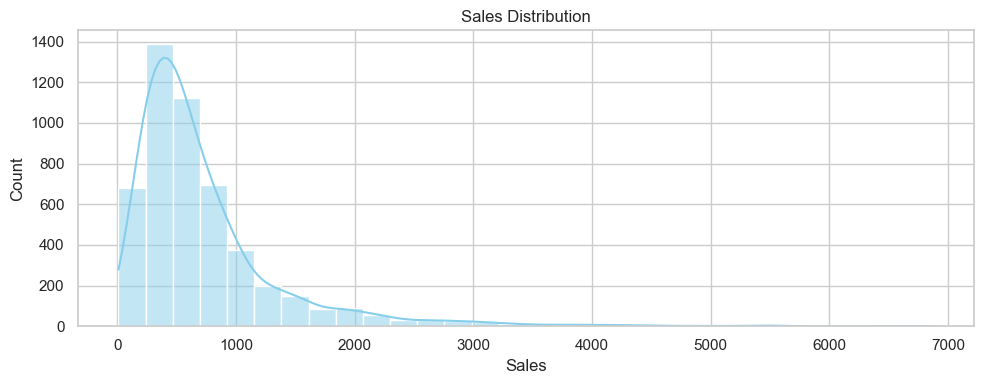

In [169]:
# Histogram of Sales
plt.figure(figsize=(10, 4))
sns.histplot(df['sales'], bins=30, kde=True, color='skyblue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()

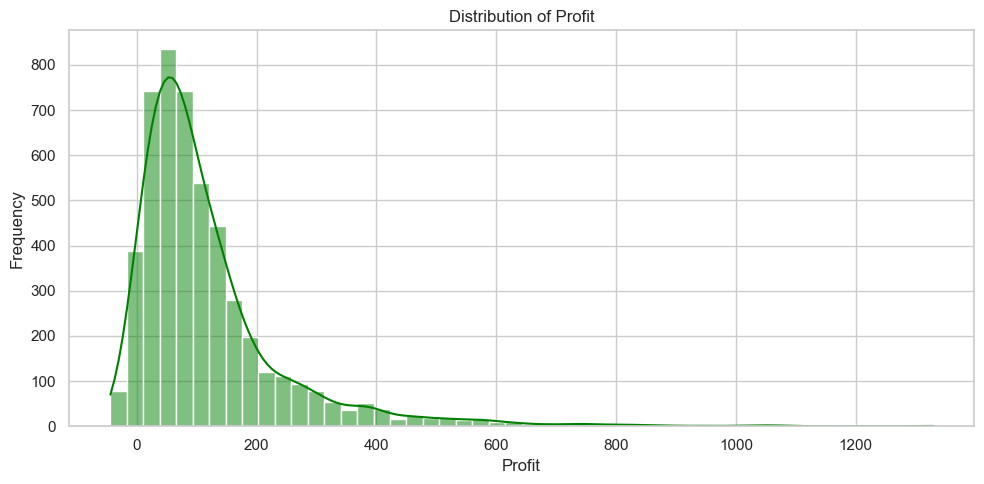

In [167]:
#Histogram: Profit Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['profit'], bins=50, kde=True, color='green')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [143]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_month',
       'ship_mode', 'customer_id', 'customer_name', 'gender', 'segment',
       'contact_id', 'addressline', 'contact', 'email', 'postal_code', 'city',
       'state', 'country', 'region', 'market', 'product_id', 'category_id',
       'category', 'sub_category_id', 'sub-category', 'product_name',
       'unit_price', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'year', 'shipping_delay_days',
       'profit_margin_percent', 'discount_%', 'year_month'],
      dtype='object')

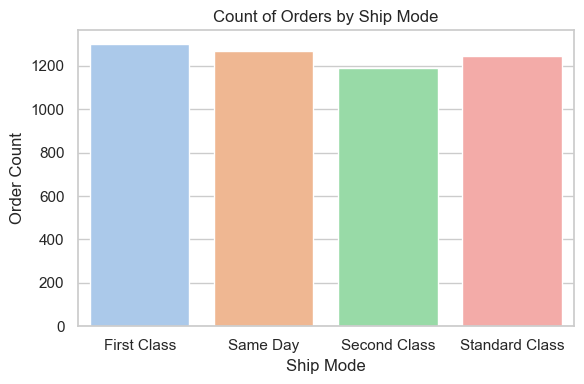

In [146]:
#Bar Plot: Ship Mode,Analyzes:Most commonly used shipping methods
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='ship_mode',hue='ship_mode',palette='pastel',legend=False)
plt.title('Count of Orders by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

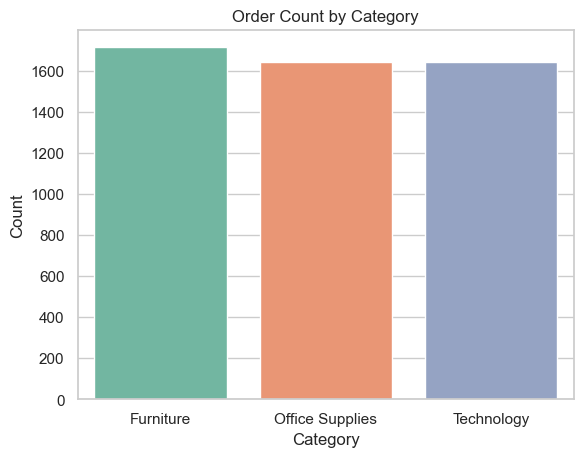

In [119]:
#Countplot – Order Count by Category
sns.countplot(x='category', data=df,hue='category',palette='Set2')
plt.title("Order Count by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [120]:
#Pie Chart – Sales Share by Region
region_sales = df.groupby('region',observed=False)['sales'].sum()

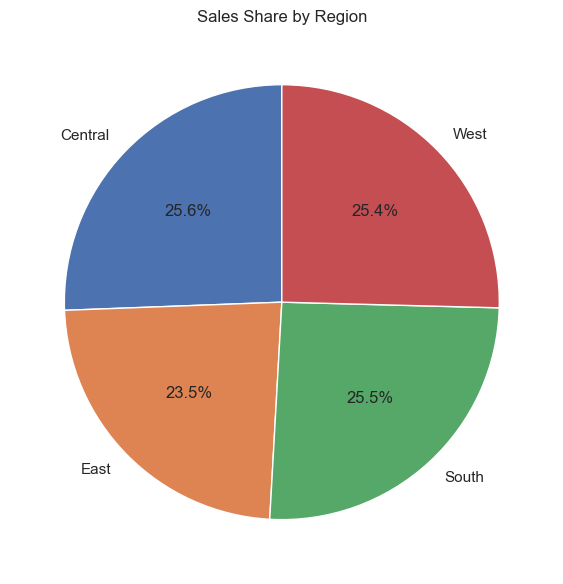

In [122]:
plt.figure(figsize=(6,6))
plt.pie(region_sales,labels=region_sales.index,autopct='%1.1f%%',startangle=90)
plt.title("Sales Share by Region")
plt.tight_layout()
plt.show()

##Bivariate Analysis

In [116]:
#Bar Plot – Total Sales by Product category
# Convert Series to DataFrame
category_sales = category_sales.reset_index()

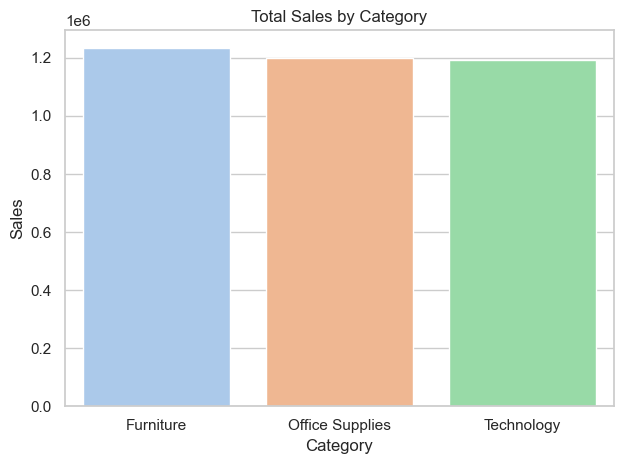

In [117]:
sns.barplot(data=category_sales, x='category', y='sales', palette='pastel', hue='category')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

In [151]:
#Bar Plot: Total Sales by Region
sales_by_region = df.groupby('region',observed=True)['sales'].sum().sort_values()

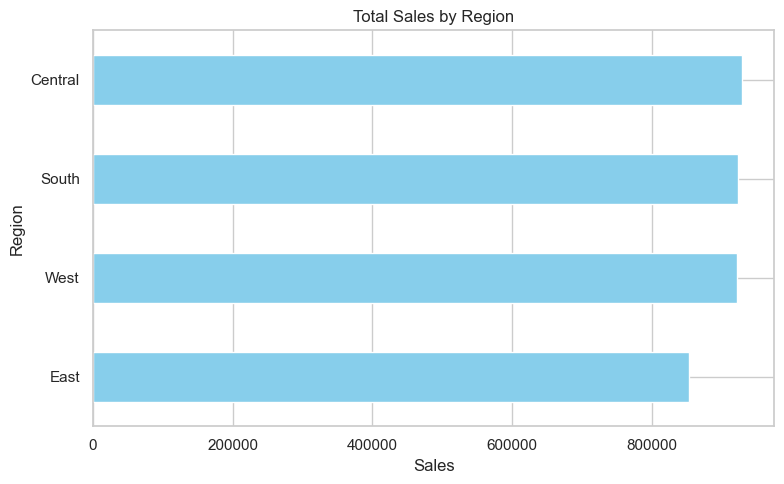

In [150]:
plt.figure(figsize=(8, 5))
sales_by_region.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

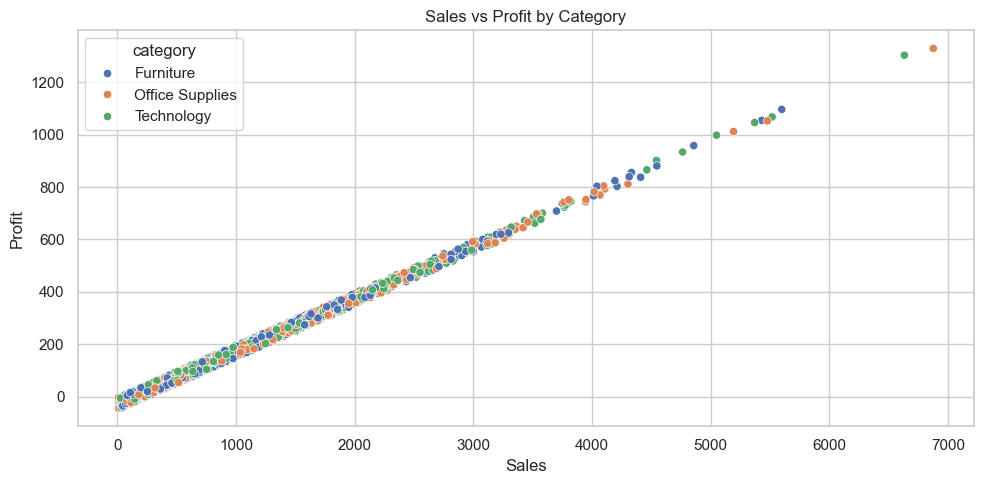

In [166]:
#Scatter Plot: showing relationship between Sales and Profit
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='sales', y='profit', hue='category')
plt.title('Sales vs Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

#Multivariate Analysis

In [94]:
#Pivot Table: Sales by Region and Category
pivot_table = pd.pivot_table(df, values='sales', index='region', columns='category', aggfunc='sum',observed=False)

In [95]:
pivot_table

category,Furniture,Office Supplies,Technology
region,,,
Central,320865.129089,305213.322516,302715.764558
East,280846.224712,296683.810726,275722.870032
South,304693.874991,301443.948754,318078.806323
West,326758.736878,297628.074271,297763.213442


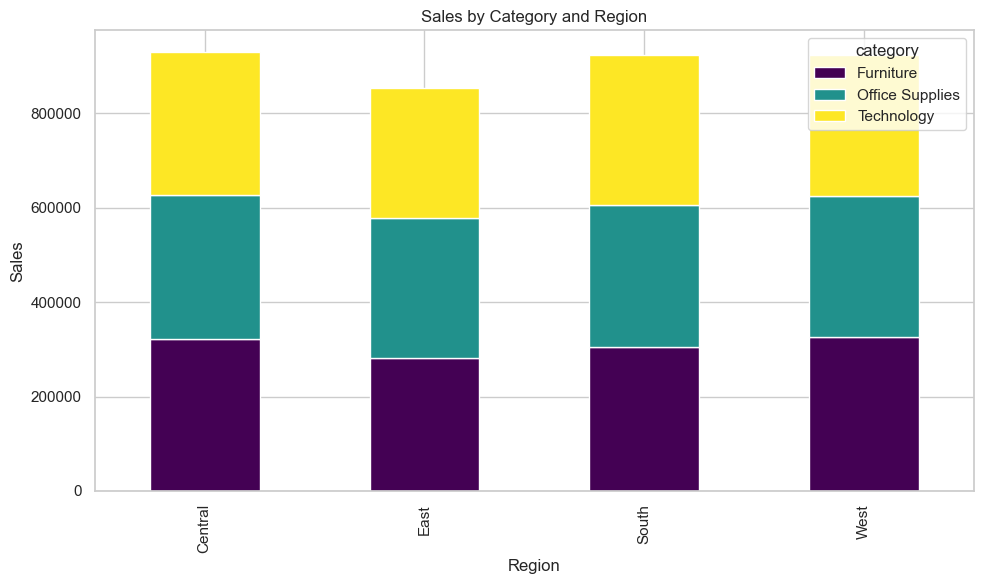

In [152]:
#Stacked Bar Chart
pivot_table.plot(kind='bar', stacked=True,figsize=(10,6),colormap='viridis')
plt.title('Sales by Category and Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

In [97]:
#Correlation Matrix – Heatmap
corr = df[['sales', 'profit', 'quantity', 'discount']].corr()

In [98]:
corr

,sales,profit,quantity,discount
sales,1.000000,0.995033,0.435253,-0.162590
profit,0.995033,1.000000,0.431279,-0.162163
quantity,0.435253,0.431279,1.000000,0.008070
discount,-0.162590,-0.162163,0.008070,1.000000


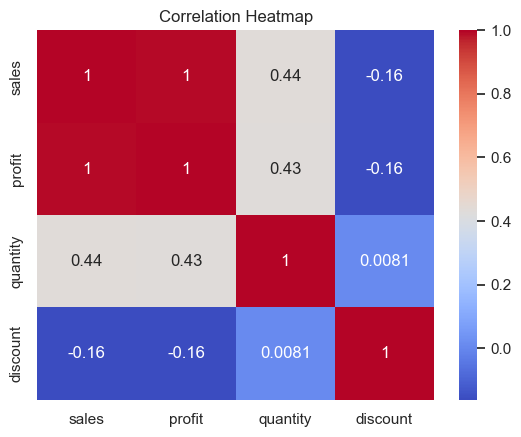

<Figure size 1000x500 with 0 Axes>

In [162]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.figure(figsize=(10, 5))
plt.show()

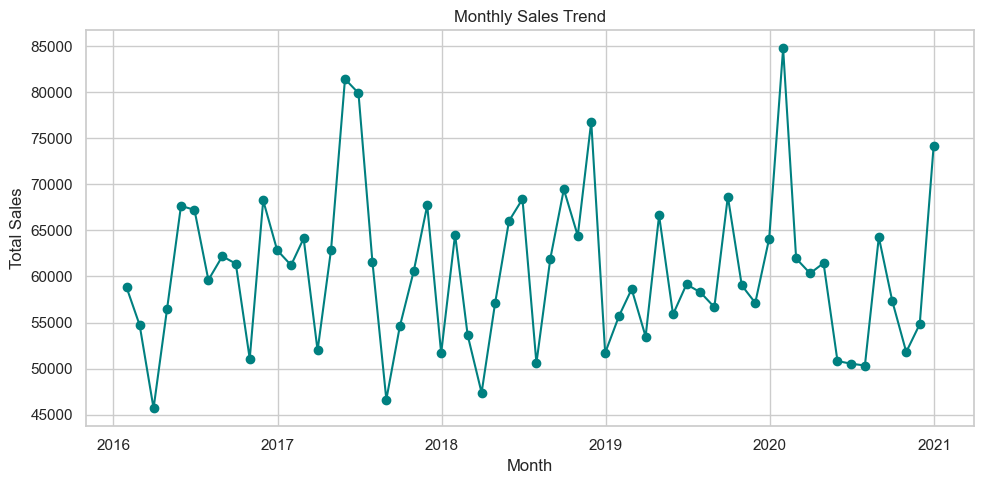

In [160]:
#Line Plot – Monthly Sales Trend
monthly_sales = df.resample('ME', on='order_date')['sales'].sum()
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show;
